# 80_PCA eigenface - 1

# Olivetti 데이터

In [47]:
# 사람들의 얼굴을 가지고 연구
# 얼굴 인식용으로 사용할 수 있지만
# 특정 인물의 데이터(10장)만 이용해서 PCA실습용으로 사용

In [48]:
from sklearn.datasets import fetch_olivetti_faces

faces_all = fetch_olivetti_faces()
print(faces_all.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [49]:
faces_all.target#==20
        # 각 인물별로 10개의 사진이 저장되어있고, 
        # 40명의 데이터가 있다.

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [50]:
k = 20
# 20번째 사람
faces = faces_all.images[faces_all.target == k]
                        # True, False 로 반환된 전체 레이블
                        

In [51]:
list = [faces_all.target == k]
print(list)

[array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False

In [52]:
faces[0]

array([[0.5165289 , 0.5123967 , 0.5082645 , ..., 0.42975205, 0.42561984,
        0.41735536],
       [0.5082645 , 0.5123967 , 0.5206612 , ..., 0.42975205, 0.42975205,
        0.4214876 ],
       [0.4876033 , 0.5123967 , 0.5289256 , ..., 0.4338843 , 0.42975205,
        0.42975205],
       ...,
       [0.3305785 , 0.44214877, 0.45041323, ..., 0.55785125, 0.5495868 ,
        0.5413223 ],
       [0.35123968, 0.4338843 , 0.446281  , ..., 0.54545456, 0.55785125,
        0.55785125],
       [0.33471075, 0.4338843 , 0.44214877, ..., 0.56198347, 0.55785125,
        0.5661157 ]], dtype=float32)

In [53]:
len(faces[0])
# 64 pixels

64

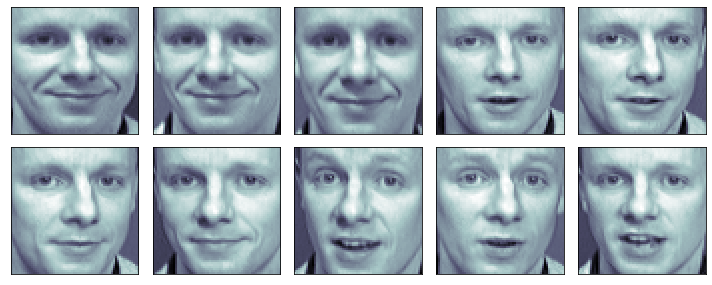

In [62]:
import matplotlib.pyplot as plt

N = 2       # 줄
M = 5       # 칸
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for n in range(N * M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(faces[n], cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

plt.tight_layout()
plt.show()

----------------

# PCA 를 이용하여 사진 나타내기

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X = faces_all.data[faces_all.target == k]
            # .images 가 아니라, .data 를 사용해야 한다.

In [ ]:
X.shape

(10, 4096)

In [ ]:
import numpy as np
np.sqrt(4096)

## 64 * 64 pixels

64.0

In [ ]:
X[0].shape

(4096,)

In [ ]:
W = pca.fit_transform(X)
W.shape

(10, 2)

In [ ]:
W
# 10장의 사진을 표현하는 백터 10개, 각각 2개씩 존재한다.

array([[-2.213672  ,  4.213516  ],
       [ 2.2680914 ,  3.7376192 ],
       [ 0.65999436,  3.1209524 ],
       [-1.7500473 , -1.4096582 ],
       [-3.3963819 , -1.5552852 ],
       [-3.3355868 , -1.7309356 ],
       [ 3.385147  , -2.1805744 ],
       [ 3.93382   , -1.5998906 ],
       [-3.2094407 , -1.228673  ],
       [ 3.6580772 , -1.3670692 ]], dtype=float32)

In [ ]:
X_inv = pca.inverse_transform(W)
            # pca의 역변환

In [ ]:
X_inv.shape
# pca의 주성분을 바탕으로 inverse_transform 한것.

(10, 4096)

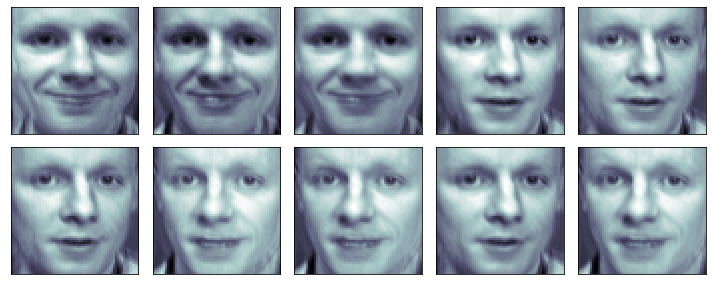

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for n in range(N * M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(X_inv[n].reshape(64,64), cmap=plt.cm.bone)
                # 
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

plt.tight_layout()
plt.show()

In [ ]:
## 화질은 떨어졌지만, 결과물은 원 데이터와 비슷하다.